# <center>CSE 4/574: Introduction to Machine Learning</center>
## <center>Chapter #2 - Regression</center>
### <center>Nitin Kulkarni</center>
#### <center>nitinvis@buffalo.edu</center>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns

## Data

In [ ]:
temperature = [55, 65, 98, 35, 75, 61, 65, 57, 57, 32, 91, 38, 64, 92, 82, 73, 62, 49, 58, 65, 49, 28, 86, 46,
               52, 68, 98, 105, 52, 66]
salary = [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111,
          67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391,
          121872]
experience = [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9,
              8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5]
data = pd.DataFrame({'Experience': experience, 'Temperature': temperature, 'Salary': salary})

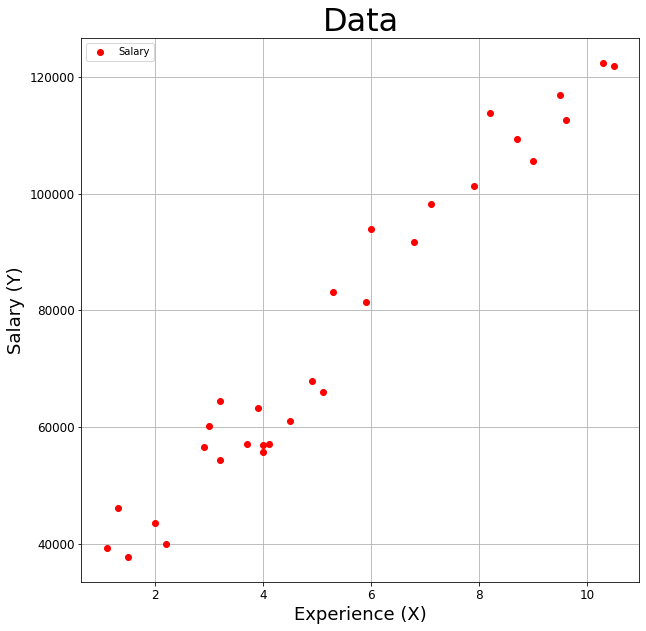

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.plot(experience, salary, 'ro', label='Salary')
plt.grid()
plt.xlabel('Experience (X)', fontsize=18)
plt.ylabel('Salary (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Data', fontsize=32)
plt.legend(loc='upper left')
plt.show()

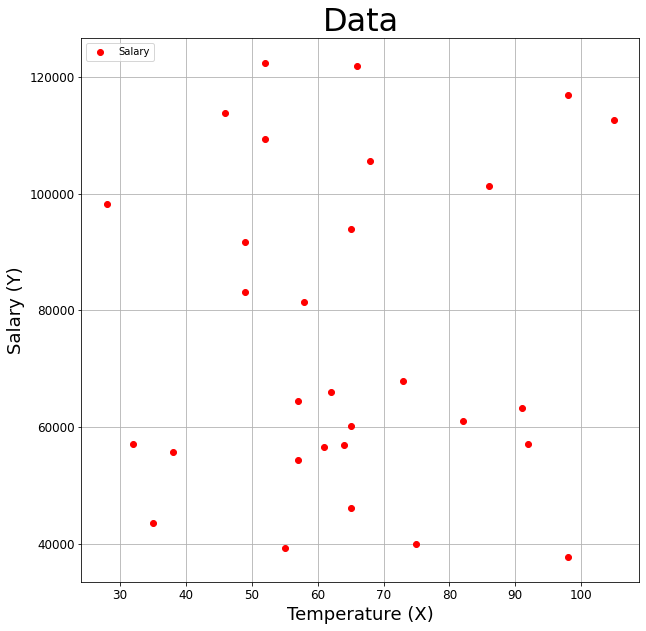

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.plot(temperature, salary, 'ro', label='Salary')
plt.grid()
plt.xlabel('Temperature (X)', fontsize=18)
plt.ylabel('Salary (Y)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Data', fontsize=32)
plt.legend(loc='upper left')
plt.show()

## Computing and plotting the correlation matrix

Correlation Matrix:
              Experience  Temperature    Salary
Experience     1.000000     0.093751  0.978242
Temperature    0.093751     1.000000  0.038515
Salary         0.978242     0.038515  1.000000


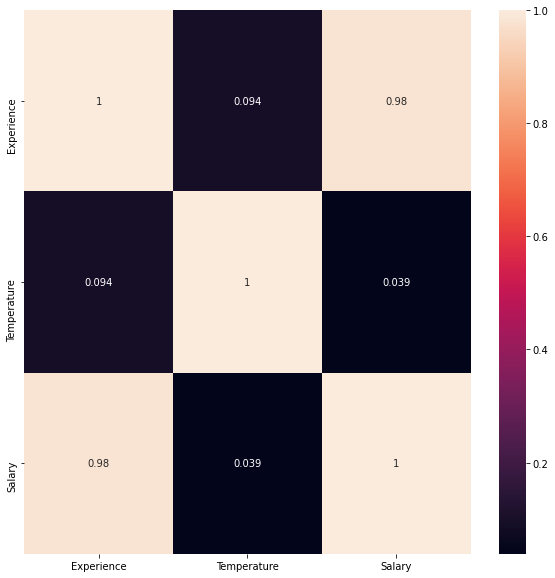

In [ ]:
correlation_matrix = data.corr()
print('Correlation Matrix:\n', correlation_matrix)


fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## R-Squared ($R^2$)

In [ ]:
# Calculating the variance around the mean salary.
mean_salary = np.mean(salary)
sum_of_squares_around_mean_salary = 0
for i in range(len(salary)):
    sum_of_squares_around_mean_salary += (salary[i] - mean_salary) ** 2
total_variance = sum_of_squares_around_mean_salary / len(salary)
print('Total Variance:', total_variance)

# Fitting a least squares line to the data.
salary = np.asarray(salary).reshape(-1, 1)
experience = np.asarray(experience).reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(experience, salary)

# Calculating the variance around the least squares line.
predictions = linear_regression.predict(experience)
sum_of_squares_around_fit = 0
for i in range(len(salary)):
    sum_of_squares_around_fit += (salary[i] - predictions[i]) ** 2
unexplained_variance = sum_of_squares_around_fit / len(salary)
print('Unexplained Variance:', unexplained_variance)

# Calculating the R-Squared value.
r_squared = (total_variance - unexplained_variance) / total_variance
print('R-Squared Value:', r_squared)

Total Variance: 726499261.7333333
Unexplained Variance: [31270951.72228097]
R-Squared Value: [0.95695666]


In [ ]:
# Calculating the variance around the mean salary.
mean_salary = np.mean(salary)
sum_of_squares_around_mean_salary = 0
for i in range(len(salary)):
    sum_of_squares_around_mean_salary += (salary[i] - mean_salary) ** 2
total_variance = sum_of_squares_around_mean_salary / len(salary)
print('Total Variance:', total_variance)

# Fitting a least squares line to the data.
salary = np.asarray(salary).reshape(-1, 1)
temperature = np.asarray(temperature).reshape(-1, 1)

linear_regression = LinearRegression()
linear_regression.fit(temperature, salary)

# Calculating the variance around the least squares line.
predictions_temperature = linear_regression.predict(experience)
sum_of_squares_around_fit = 0
for i in range(len(salary)):
    sum_of_squares_around_fit += (salary[i] - predictions_temperature[i]) ** 2
unexplained_variance = sum_of_squares_around_fit / len(salary)
print('Unexplained Variance:', unexplained_variance)

# Calculating the R-Squared value.
r_squared = (total_variance - unexplained_variance) / total_variance
print('R-Squared Value:', r_squared)

Total Variance: [7.26499262e+08]
Unexplained Variance: [7.28363636e+08]
R-Squared Value: [-0.00256624]


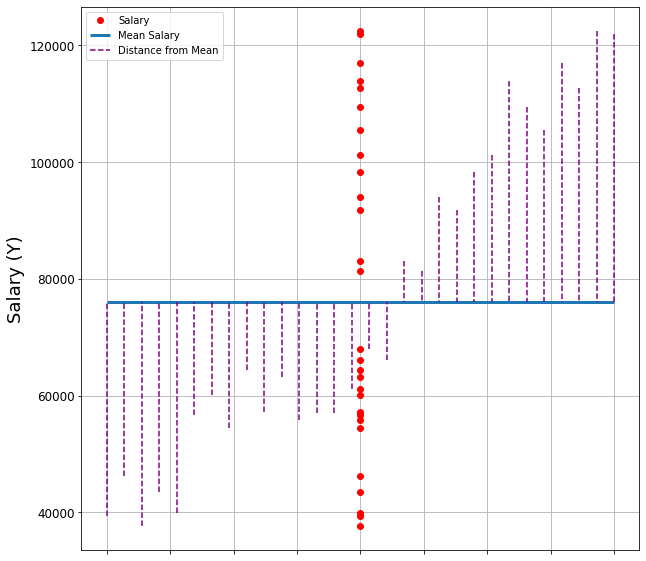

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.plot([0 for _ in range(len(salary))], salary, 'ro', label='Salary')
plt.hlines(mean_salary, xmin=-1, xmax=1, lw=3, label='Mean Salary')
plt.vlines(np.linspace(-1, 1, len(salary)), ymin=salary, ymax=mean_salary, ls='--', colors='purple', label='Distance from Mean')
plt.grid()
plt.ylabel('Salary (Y)', fontsize=18)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', which='both', labelbottom=False)
plt.legend(loc='upper left')
plt.show()

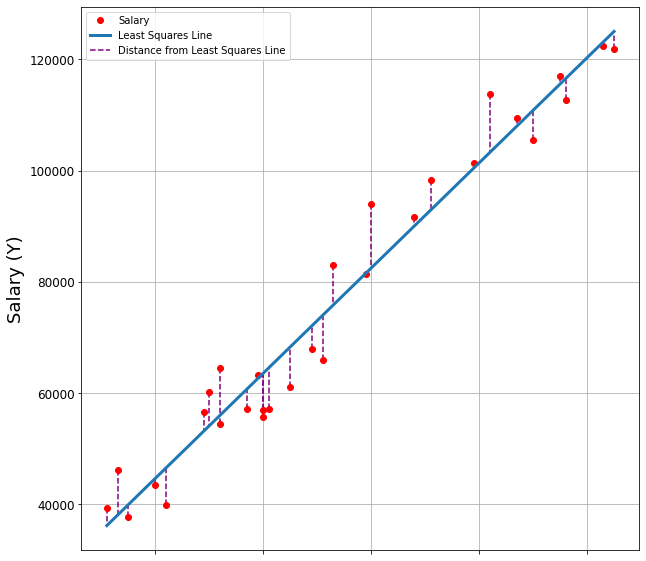

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.plot(experience, salary, 'ro', label='Salary')
plt.plot(experience, predictions, lw=3, label='Least Squares Line')
plt.vlines(experience, ymin=salary, ymax=predictions, ls='--', colors='purple', label='Distance from Least Squares Line')
plt.grid()
plt.ylabel('Salary (Y)', fontsize=18)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', which='both', labelbottom=False)
plt.legend(loc='upper left')
plt.show()

## Linear Regression

In [ ]:
# Create the train and test datasets.
train_x, test_x, train_y, test_y = train_test_split(experience, salary, test_size=0.2, random_state=3)

# Fitting a least squares line to the training data.
linear_regression = LinearRegression()
linear_regression.fit(train_x, train_y)

# Getting the predictions and calculating the Sum of squared errors.
predictions = linear_regression.predict(test_x)
rmse = mean_squared_error(test_y, predictions, squared=False)

# How good is our model?
print('RMSE:', rmse)

RMSE: 3816.332048804825


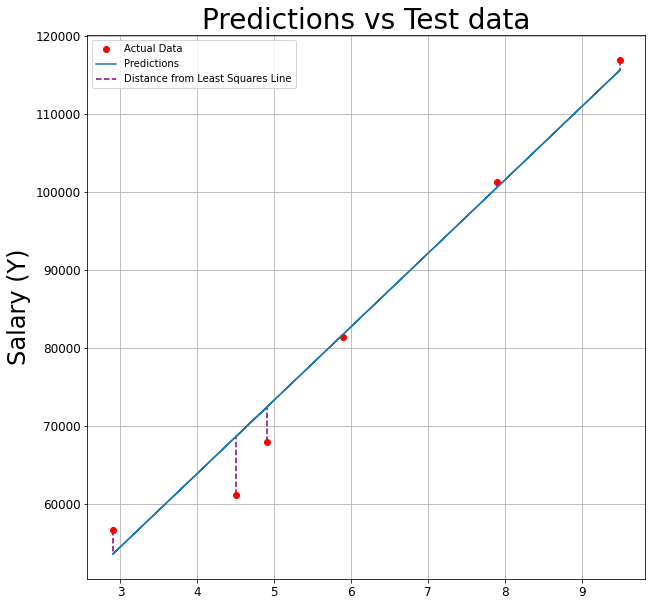

In [ ]:
# Plotting the predictions vs the actual data.
plt.figure(figsize=(10, 10))
plt.plot(test_x, test_y, 'ro', label='Actual Data')
plt.plot(test_x, predictions, label='Predictions')
plt.vlines(test_x, ymin=test_y, ymax=predictions, ls='--', colors='purple', label='Distance from Least Squares Line')
plt.grid()
plt.ylabel('Salary (Y)', fontsize=24)
plt.title('Predictions vs Test data', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

## Bias vs Variance

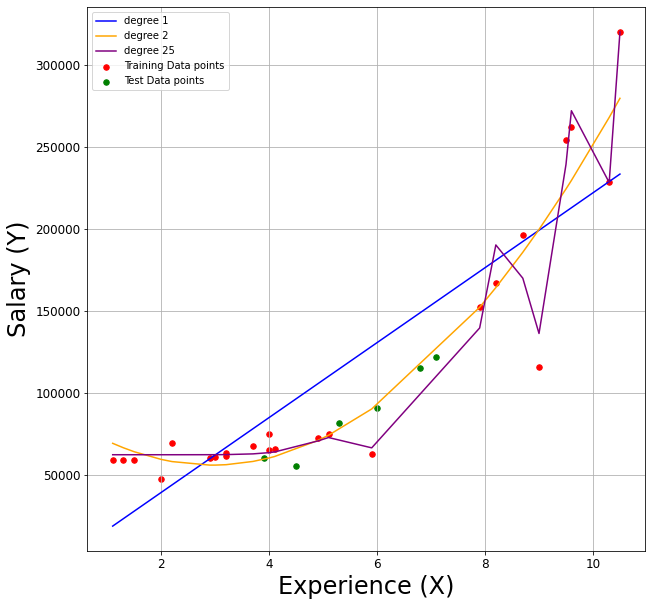

In [ ]:
experience = np.asarray([1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8,
                         7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5]).reshape(-1, 1)

salary = np.asarray([experience ** 4 * 1000 / 85 * np.random.uniform(1, 4) + 15000 * np.random.uniform(1, 4)]).reshape(-1, 1)

salary = np.asarray([59267, 59301, 59353, 47615, 69793, 60925, 61171, 61742, 63742, 67719, 60771, 75361, 65361, 65997,
                     56049, 73033, 75428, 82122, 63241, 91258, 115419, 122068, 152478, 167470, 196384, 116302, 254225,
                     262565, 228678, 320224]).reshape(-1, 1)

# Create the train and test datasets.
train_x, test_x, train_y, test_y = train_test_split(experience, salary, test_size=0.2, random_state=1)


sorted_train_x, sorted_train_y = zip(*sorted(zip(train_x, train_y)))
sorted_test_x, sorted_test_y = zip(*sorted(zip(test_x, test_y)))

test_predictions = []

colors = ['blue', 'orange', 'purple']
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(train_x, train_y, color='red', s=30, marker='o', label="Training Data points")
plt.scatter(test_x, test_y, color='green', s=30, marker='o', label="Test Data points")
for count, degree in enumerate([1, 2, 25]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(sorted_train_x, sorted_train_y)
    train_prediction = model.predict(sorted_train_x)
    test_prediction = model.predict(sorted_test_x)
    test_predictions.append(test_prediction)
    plt.plot(sorted_train_x, train_prediction, color=colors[count], label="degree %d" % degree)
plt.xlabel('Experience (X)', fontsize=24)
plt.ylabel('Salary (Y)', fontsize=24)
# plt.title('Bias', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.show()

<ipython-input-29-affbcd5823d0>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(test_x, test_y, 'ro', color='green', label='Test Data')


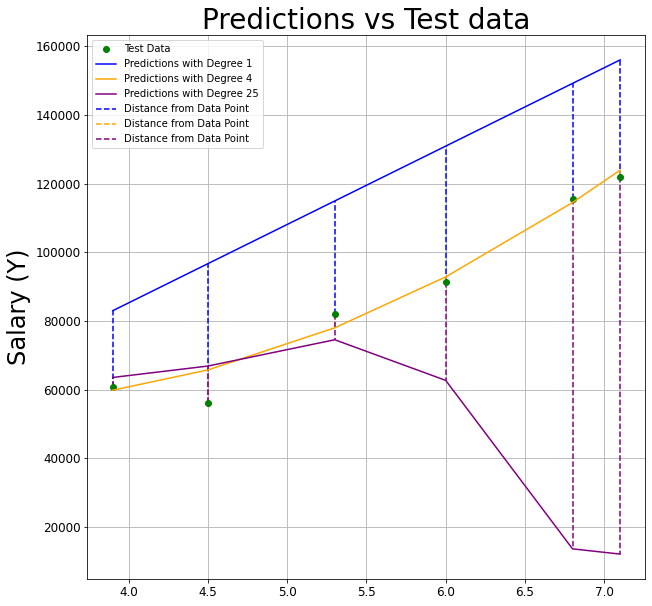

In [ ]:
# Plotting the predictions vs the actual data.
plt.figure(figsize=(10, 10))
plt.plot(test_x, test_y, 'ro', color='green', label='Test Data')
plt.plot(sorted_test_x, test_predictions[0], color='blue', label='Predictions with Degree 1')
plt.vlines(sorted_test_x, ymin=sorted_test_y, ymax=test_predictions[0], ls='--', colors='blue',
           label='Distance from Data Point')
plt.plot(sorted_test_x, test_predictions[1], color='orange', label='Predictions with Degree 4')
plt.vlines(sorted_test_x, ymin=sorted_test_y, ymax=test_predictions[1], ls='--', colors='orange',
           label='Distance from Data Point')
plt.plot(sorted_test_x, test_predictions[2], color='purple', label='Predictions with Degree 25')
plt.vlines(sorted_test_x, ymin=sorted_test_y, ymax=test_predictions[2], ls='--', colors='purple',
           label='Distance from Data Point')
plt.grid()
plt.ylabel('Salary (Y)', fontsize=24)
plt.title('Predictions vs Test data', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()


## Ridge Regression

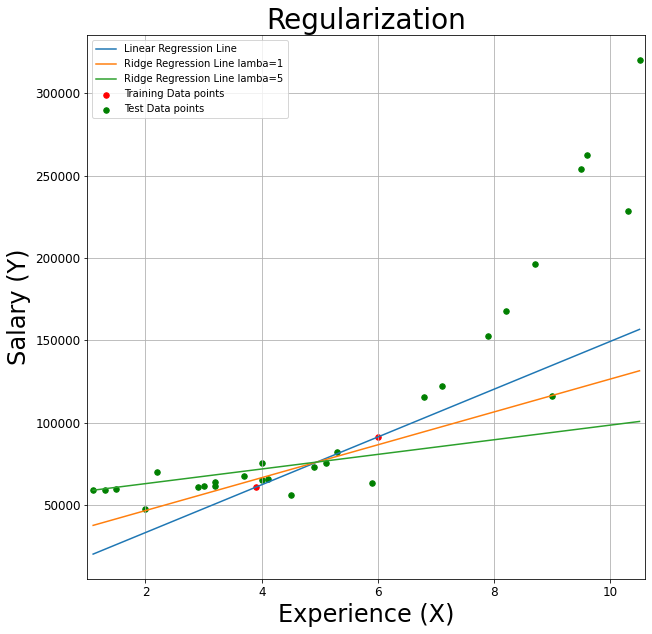

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(experience, salary, test_size=0.93, shuffle=True, random_state=18)

sorted_train_x, sorted_train_y = zip(*sorted(zip(train_x, train_y)))
sorted_test_x, sorted_test_y = zip(*sorted(zip(test_x, test_y)))

linear_regression = LinearRegression()
linear_regression.fit(train_x, train_y)

ridge_regression_1 = Ridge()
ridge_regression_1.fit(train_x, train_y)

ridge_regression_5 = Ridge(5)
ridge_regression_5.fit(train_x, train_y)

test_predictions = []

colors = ['blue', 'orange', 'purple']
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(train_x, train_y, color='red', s=30, marker='o', label="Training Data points")
plt.scatter(test_x, test_y, color='green', s=30, marker='o', label="Test Data points")
plt.plot(experience, linear_regression.predict(experience), label='Linear Regression Line')
plt.plot(experience, ridge_regression_1.predict(experience), label='Ridge Regression Line lamba=1')
plt.plot(experience, ridge_regression_5.predict(experience), label='Ridge Regression Line lamba=5')
plt.xlabel('Experience (X)', fontsize=24)
plt.ylabel('Salary (Y)', fontsize=24)
plt.title('Regularization', fontsize=28)
plt.xlim(1, 10.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.show()

### Error on Training Dataset

In [ ]:
# Getting the predictions and calculating the Sum of squared errors.

predictions_linear_regression = linear_regression.predict(train_x)
sum_of_squared_errors_linear_regression = 0
for i in range(len(train_y)):
    sum_of_squared_errors_linear_regression += (train_y[i] - predictions_linear_regression[i]) ** 2
    
predictions_ridge_regression_1 = ridge_regression_1.predict(train_x)
sum_of_squared_errors_ridge_regression_1 = 0
for i in range(len(train_y)):
    sum_of_squared_errors_ridge_regression_1 += (train_y[i] - predictions_ridge_regression_1[i]) ** 2

predictions_ridge_regression_5 = ridge_regression_5.predict(train_x)
sum_of_squared_errors_ridge_regression_5 = 0
for i in range(len(train_y)):
    sum_of_squared_errors_ridge_regression_5 += (train_y[i] - predictions_ridge_regression_5[i]) ** 2

# How good is our model?
print('Sum of Squared Errors Linear Regression:', sum_of_squared_errors_linear_regression)
print('RMSE Linear Regression:', np.sqrt(sum_of_squared_errors_linear_regression) / len(train_y))

print('\nSum of Squared Errors Ridge Regression (Lambda=1):', sum_of_squared_errors_ridge_regression_1)
print('RMSE Linear Regression (Lambda=1):', np.sqrt(sum_of_squared_errors_ridge_regression_1) / len(train_y))

print('\nSum of Squared Errors Ridge Regression (Lambda=5):', sum_of_squared_errors_ridge_regression_5)
print('RMSE Ridge Regression (Lambda=5):', np.sqrt(sum_of_squared_errors_ridge_regression_5) / len(train_y))

Sum of Squared Errors Linear Regression: [5.29395592e-23]
RMSE Linear Regression: [3.63797881e-12]

Sum of Squared Errors Ridge Regression (Lambda=1): [45242158.62987097]
RMSE Linear Regression (Lambda=1): [3363.11457692]

Sum of Squared Errors Ridge Regression (Lambda=5): [2.23805845e+08]
RMSE Ridge Regression (Lambda=5): [7480.07093617]


###  Error on Test Dataset

In [ ]:
# Getting the predictions and calculating the Sum of squared errors.

predictions_linear_regression = linear_regression.predict(test_x)
sum_of_squared_errors_linear_regression = 0
for i in range(len(test_y)):
    sum_of_squared_errors_linear_regression += (test_y[i] - predictions_linear_regression[i]) ** 2
    
predictions_ridge_regression_1 = ridge_regression_1.predict(test_x)
sum_of_squared_errors_ridge_regression_1 = 0
for i in range(len(test_y)):
    sum_of_squared_errors_ridge_regression_1 += (test_y[i] - predictions_ridge_regression_1[i]) ** 2

predictions_ridge_regression_5 = ridge_regression_5.predict(test_x)
sum_of_squared_errors_ridge_regression_5 = 0
for i in range(len(test_y)):
    sum_of_squared_errors_ridge_regression_5 += (test_y[i] - predictions_ridge_regression_5[i]) ** 2

# How good is our model?
print('Sum of Squared Errors Linear Regression:', sum_of_squared_errors_linear_regression)
print('RMSE Linear Regression:', np.sqrt(sum_of_squared_errors_linear_regression) / len(test_y))

print('\nSum of Squared Errors Ridge Regression (Lambda=1):', sum_of_squared_errors_ridge_regression_1)
print('RMSE Linear Regression (Lambda=1):', np.sqrt(sum_of_squared_errors_ridge_regression_1) / len(test_y))

print('\nSum of Squared Errors Ridge Regression (Lambda=5):', sum_of_squared_errors_ridge_regression_5)
print('RMSE Ridge Regression (Lambda=5):', np.sqrt(sum_of_squared_errors_ridge_regression_5) / len(test_y))

Sum of Squared Errors Linear Regression: [7.44969454e+10]
RMSE Linear Regression: [9747.90305709]

Sum of Squared Errors Ridge Regression (Lambda=1): [9.89150621e+10]
RMSE Linear Regression (Lambda=1): [11232.41608329]

Sum of Squared Errors Ridge Regression (Lambda=5): [1.41951896e+11]
RMSE Ridge Regression (Lambda=5): [13455.89430754]


## Lasso Regression

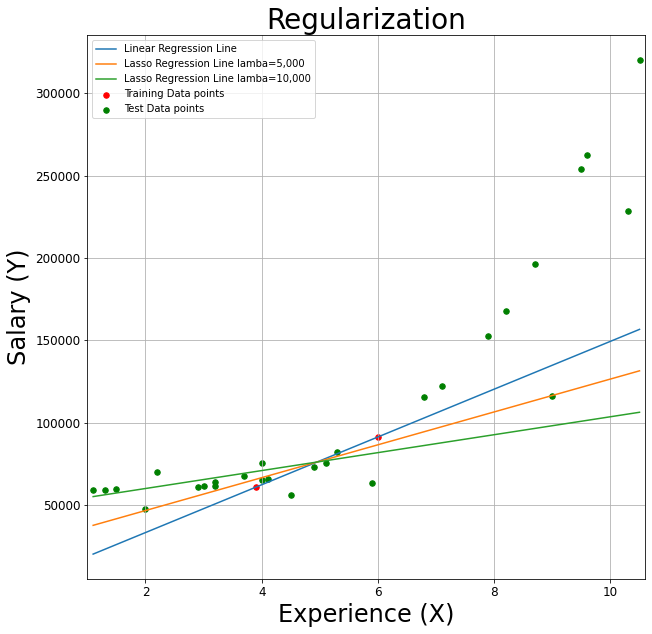

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(train_x, train_y)

lasso_regression_5k = Lasso(5000)
lasso_regression_5k.fit(train_x, train_y)

lasso_regression_10k = Lasso(10000)
lasso_regression_10k.fit(train_x, train_y)

test_predictions = []

colors = ['blue', 'orange', 'purple']
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(train_x, train_y, color='red', s=30, marker='o', label="Training Data points")
plt.scatter(test_x, test_y, color='green', s=30, marker='o', label="Test Data points")
plt.plot(experience, linear_regression.predict(experience), label='Linear Regression Line')
plt.plot(experience, lasso_regression_5k.predict(experience), label='Lasso Regression Line lamba=5,000')
plt.plot(experience, lasso_regression_10k.predict(experience), label='Lasso Regression Line lamba=10,000')
plt.xlabel('Experience (X)', fontsize=24)
plt.ylabel('Salary (Y)', fontsize=24)
plt.title('Regularization', fontsize=28)
plt.xlim(1, 10.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.show()

### Error on the Train dataset

In [ ]:
# Getting the predictions and calculating the Sum of squared errors.

predictions_linear_regression = linear_regression.predict(train_x)
sum_of_squared_errors_linear_regression = 0
for i in range(len(train_y)):
    sum_of_squared_errors_linear_regression += (train_y[i] - predictions_linear_regression[i]) ** 2
    
predictions_lasso_regression_5k = lasso_regression_5k.predict(train_x)
sum_of_squared_errors_lasso_regression_5k = 0
for i in range(len(train_y)):
    sum_of_squared_errors_lasso_regression_5k += (train_y[i] - predictions_lasso_regression_5k[i]) ** 2

predictions_lasso_regression_10k = lasso_regression_10k.predict(train_x)
sum_of_squared_errors_lasso_regression_10k = 0
for i in range(len(train_y)):
    sum_of_squared_errors_lasso_regression_10k += (train_y[i] - predictions_lasso_regression_10k[i]) ** 2

# How good is our model?
print('Sum of Squared Errors Linear Regression:', sum_of_squared_errors_linear_regression)
print('RMSE Linear Regression:', np.sqrt(sum_of_squared_errors_linear_regression) / len(train_y))

print('\nSum of Squared Errors Lasso Regression (Lambda=1):', sum_of_squared_errors_lasso_regression_5k)
print('RMSE Linear Regression (Lambda=1):', np.sqrt(sum_of_squared_errors_lasso_regression_5k) / len(train_y))

print('\nSum of Squared Errors Lasso Regression (Lambda=10k):', sum_of_squared_errors_lasso_regression_10k)
print('RMSE Ridge Regression (Lambda=5):', np.sqrt(sum_of_squared_errors_lasso_regression_10k) / len(train_y))

Sum of Squared Errors Linear Regression: [5.29395592e-23]
RMSE Linear Regression: [3.63797881e-12]

Sum of Squared Errors Lasso Regression (Lambda=1): [45351473.92290252]
RMSE Linear Regression (Lambda=1): [3367.17514851]

Sum of Squared Errors Lasso Regression (Lambda=10k): [1.81405896e+08]
RMSE Ridge Regression (Lambda=5): [6734.35029701]


### Error on the Test dataset

In [ ]:
# Getting the predictions and calculating the Sum of squared errors.

predictions_linear_regression = linear_regression.predict(test_x)
sum_of_squared_errors_linear_regression = 0
for i in range(len(test_y)):
    sum_of_squared_errors_linear_regression += (test_y[i] - predictions_linear_regression[i]) ** 2
    
predictions_lasso_regression_5k = lasso_regression_5k.predict(test_x)
sum_of_squared_errors_lasso_regression_5k = 0
for i in range(len(test_y)):
    sum_of_squared_errors_lasso_regression_5k += (test_y[i] - predictions_lasso_regression_5k[i]) ** 2

predictions_lasso_regression_10k = lasso_regression_10k.predict(test_x)
sum_of_squared_errors_lasso_regression_10k = 0
for i in range(len(test_y)):
    sum_of_squared_errors_lasso_regression_10k += (test_y[i] - predictions_lasso_regression_10k[i]) ** 2

# How good is our model?
print('Sum of Squared Errors Linear Regression:', sum_of_squared_errors_linear_regression)
print('RMSE Linear Regression:', np.sqrt(sum_of_squared_errors_linear_regression) / len(train_y))

print('\nSum of Squared Errors Lasso Regression (Lambda=1):', sum_of_squared_errors_lasso_regression_5k)
print('RMSE Linear Regression (Lambda=1):', np.sqrt(sum_of_squared_errors_lasso_regression_5k) / len(train_y))

print('\nSum of Squared Errors Lasso Regression (Lambda=10k):', sum_of_squared_errors_lasso_regression_10k)
print('RMSE Ridge Regression (Lambda=5):', np.sqrt(sum_of_squared_errors_lasso_regression_10k) / len(train_y))

Sum of Squared Errors Linear Regression: [7.44969454e+10]
RMSE Linear Regression: [136470.64279928]

Sum of Squared Errors Lasso Regression (Lambda=1): [9.89503806e+10]
RMSE Linear Regression (Lambda=1): [157281.89705265]

Sum of Squared Errors Lasso Regression (Lambda=10k): [1.33083322e+11]
RMSE Ridge Regression (Lambda=5): [182402.93426013]
